In [1]:
def bmw_finder(mileage,price):
    if price>25000:
        return 1
    else:
        return 0

In [2]:
from car_data import bmws,priuses

In [3]:
all_car_data=[]
for bmw in bmws:
    all_car_data.append((bmw.mileage,bmw.price,1))
for priuse in priuses:
    all_car_data.append((priuse.mileage,priuse.price,0))

In [4]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

In [5]:
def test_classifier(classifier,data):
    trues=0
    falses=0
    for mileage,price,is_bwm in data:
        if classifier(mileage,price)==is_bwm:
            trues+=1
        else:
            falses+=1
    return trues/(trues+falses)

In [6]:
test_classifier(bmw_finder,all_car_data)

0.59

In [7]:
def test_classifier(classifier,data,verbose=False):
    true_positives=0
    true_negatives=0
    false_positives=0
    false_negatives=0
    for mileage,price,is_bwm in data:
        predicted=classifier(mileage,price)
        if predicted and is_bwm:
            true_positives+=1
        elif predicted:
            false_positives+=1
        elif is_bwm:
            false_negatives+=1
        else:
            true_negatives+=1
    
    if verbose:
        print("true positive %f"%true_positives)
        print("true negatives %f"%true_negatives)
        print("false positive %f"%false_positives)
        print("false positive %f"%false_negatives)
        
    total=true_positives+true_negatives
        
    return total/len(data)

In [8]:
test_classifier(bmw_finder,all_car_data,verbose=True)

true positive 18.000000
true negatives 100.000000
false positive 0.000000
false positive 82.000000


0.59

In [9]:
def bmw_finder2(mileage,price):
    if price>20000:
        return 1
    else:
        return 0

In [10]:
test_classifier(bmw_finder2,all_car_data)

0.735

In [11]:
import matplotlib.pyplot as plt

def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

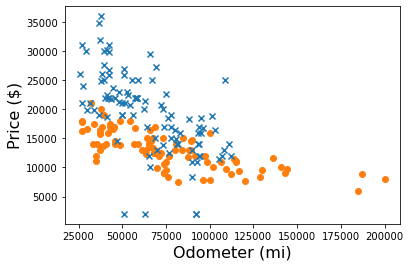

In [12]:
plot_data(all_car_data)

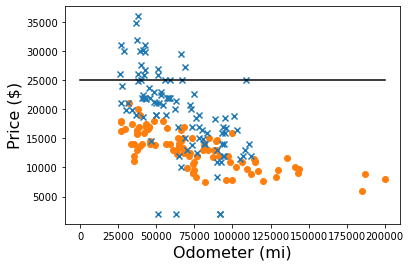

In [13]:
import numpy as np

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

plot_data(all_car_data)
plot_function(lambda x: 25000, 0, 200000, c='k')

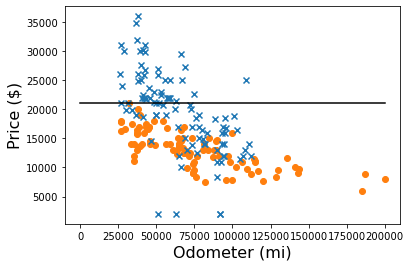

In [14]:
plot_data(all_car_data)
plot_function(lambda x: 21000, 0, 200000, c='k')

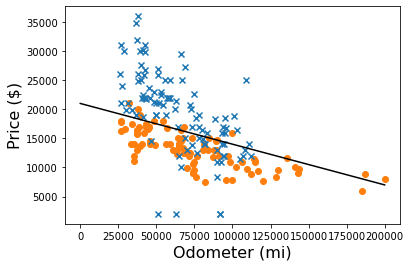

In [15]:
plot_data(all_car_data)
plot_function(lambda x: 21000-0.07*x, 0, 200000, c='k')

In [16]:
def decision_boundary_classify(mileage,price):
    if price>21000-0.07*mileage:
        return 1
    else:
        return 0

In [17]:
test_classifier(decision_boundary_classify,all_car_data)

0.805

In [18]:
def constant_price_classifier(cutoff_price):
    def c(x,p):
        if p>cutoff_price:
            return 1
        else:
            return 0
    return c

In [19]:
def cutoff_accuracy(cutoff_price):
    c=constant_price_classifier(cutoff_price)
    return test_classifier(c,all_car_data)

In [20]:
all_prices = [price for (mileage,price,is_bmw) in all_car_data]
max(all_prices,key=cutoff_accuracy)

17998.0

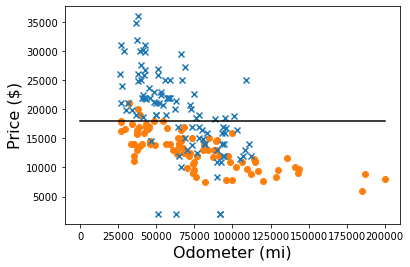

In [21]:
plot_data(all_car_data)
plot_function(lambda x: 17998.0, 0, 200000, c='k')

In [22]:
test_classifier(constant_price_classifier(17998.0),all_car_data)

0.795

In [23]:
def make_scale(data):
    min_val=min(data)
    max_val=max(data)
    def scale(x):
        return (x-min_val)/(max_val-min_val)
    def unscale(y):
        return y*(max_val-min_val)+min_val
    return scale,unscale

price_scale,price_unscale=make_scale([x[1] for x in all_car_data])
mileage_scale,mileage_unscale=make_scale([x[0] for x in all_car_data])

In [24]:
scaled_car_data=[(mileage_scale(mileage),price_scale(price),is_bmw)for mileage,price,is_bmw in all_car_data]

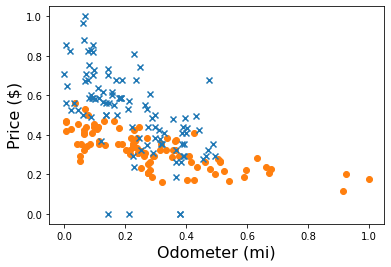

In [25]:
plot_data(scaled_car_data)

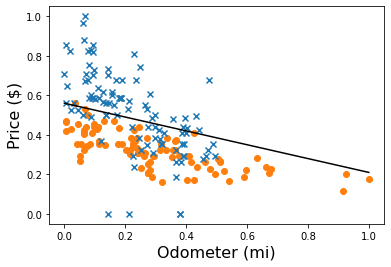

In [26]:
plot_data(scaled_car_data)
plot_function(lambda x: 0.56-0.35*x, 0, 1, c='k')

<Figure size 504x504 with 0 Axes>

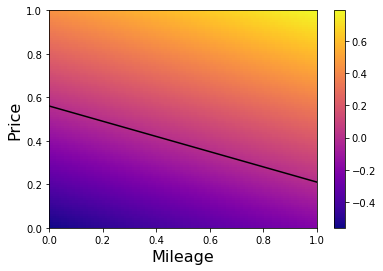

In [27]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

scalar_field_heatmap(lambda x,p: p + 0.35*x - 0.56, 0, 1,0,1)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

In [28]:
from math import exp
def sigmoid(x):
    return 1/(1+exp(-x))

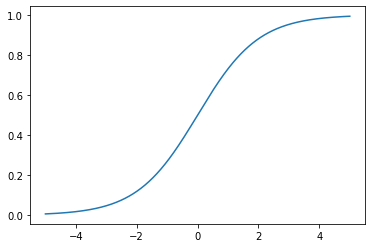

In [29]:
plot_function(sigmoid, -5, 5)

<Figure size 504x504 with 0 Axes>

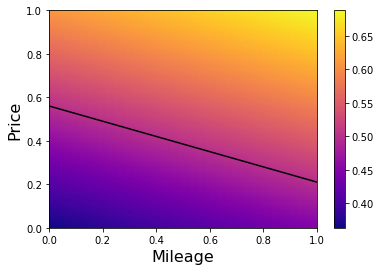

In [30]:
def f(x,p):
    return p + 0.35 * x - 0.56

def l(x,p):
    return sigmoid(f(x,p))

scalar_field_heatmap(l, 0, 1,0,1)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

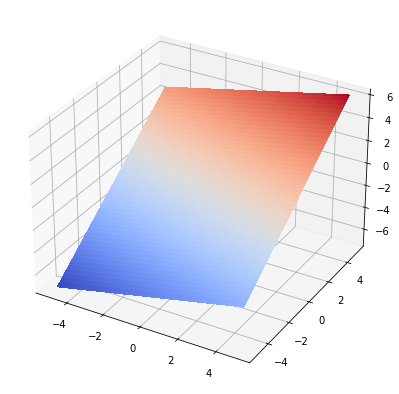

In [31]:
from matplotlib.pyplot import cm

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

plot_scalar_field(f, -5, 5, -5, 5)

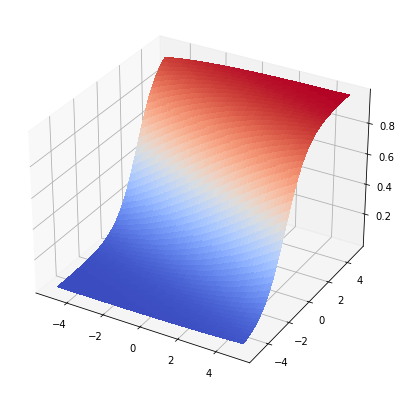

In [32]:
plot_scalar_field(l, -5, 5, -5, 5)

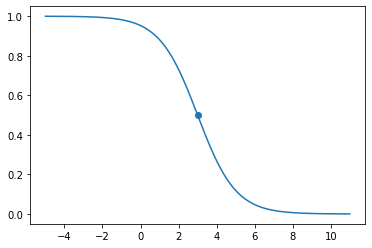

In [33]:
plot_function(lambda x:sigmoid(3-x), -5,11)
plt.scatter(3,0.5)

In [34]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x+b*p-c)
    return l

In [35]:
def simple_logistic_cost(a,b,c):
    l=make_logistic(a,b,c)
    errors=[abs(is_bmw-l(x,p)) for x,p,is_bmw in scaled_car_data]
    return sum(errors)

In [36]:
from math import log
-log(0.01)

4.605170185988091

In [37]:
-log(0.001)

6.907755278982137

In [38]:
def point_cost(l,x,p,is_bmw):
    wrong=1-is_bmw
    return -log(abs(wrong-l(x,p)))

def logistic_cost(a,b,c):
    l=make_logistic(a,b,c)
    errors=[point_cost(l,x,p,is_bmw)for x,p,is_bmw in scaled_car_data]
    return sum(errors)

In [39]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c=acoeff,bcoeff,ccoeff
    if b==0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

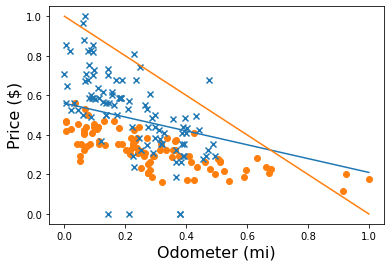

In [40]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(1,1,1)

In [41]:
logistic_cost(0.35,1,0.56)

130.92490748700456

In [42]:
logistic_cost(1,1,1)

135.56446830870456

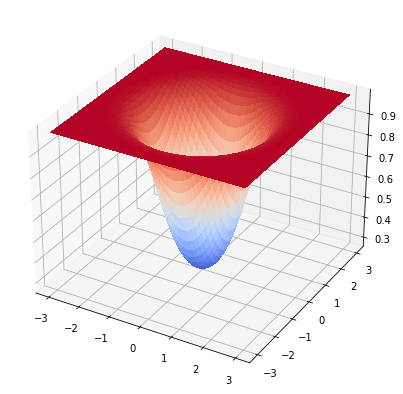

In [43]:
def k(x,y):
    return sigmoid(x**2+y**2-1)
plot_scalar_field(k,-3,3,-3,3)

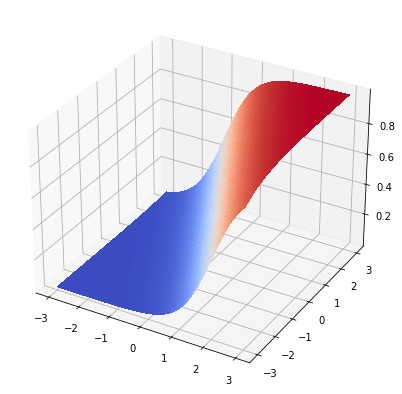

In [44]:
plot_scalar_field(lambda x,y:sigmoid(2*x+y-1),-3,3,-3,3)

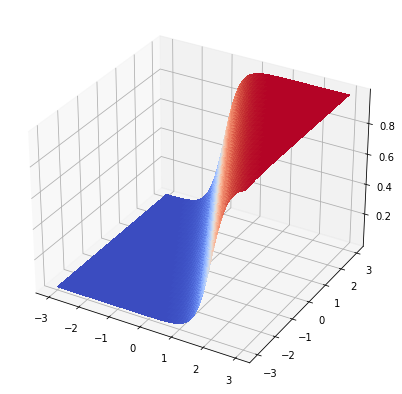

In [45]:
plot_scalar_field(lambda x,y:sigmoid(4*x+2*y-2),-3,3,-3,3)

In [46]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x=approx_gradient(lambda x:f(x,y0),x0,dx=dx)
    partial_y=approx_gradient(lambda y:f(x0,y),y0,dx=dx)    
    return (partial_x,partial_y)

In [50]:
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x=approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y=approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)  
    partial_z=approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)    
    return (partial_x,partial_y,partial_z)

In [54]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x=xstart
    y=ystart
    z=zstart
    grad=approx_gradient3(f,x,y,z)
    steps=0
    while length(grad)>tolerance and steps<max_steps:
        x-=0.01*grad[0]
        y-=0.01*grad[1]
        z-=0.01*grad[2]
        grad=approx_gradient3(f,x,y,z)
        steps+=1
    return x,y,z

In [55]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

(0.21114493546399946, 5.04543972557848, 2.1260122558655405)

In [56]:
gradient_descent3(logistic_cost,1,1,1,max_steps=200)

(0.884571531298388, 6.657543188981642, 2.955057286988365)

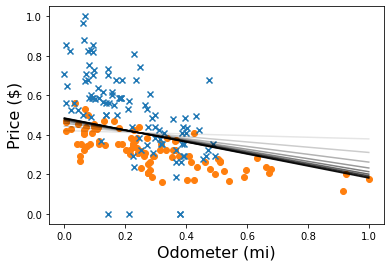

In [57]:
plot_data(scaled_car_data)
for i in range(0,1000,100):
    a,b,c = gradient_descent3(logistic_cost,1,1,1,max_steps=i)
    plot_line(a,b,c,alpha=i/1000,c='k')

In [58]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

(3.7167003153580045, 11.422062409195114, 5.596878367305919)

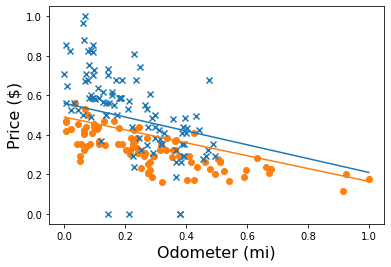

In [59]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919)

In [60]:
 def best_logistic_classifier(x,p):
        l=make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919)
        if l(x,p)>0.5:
            return 1
        else:
            return 0

In [61]:
test_classifier(best_logistic_classifier,scaled_car_data)

0.8

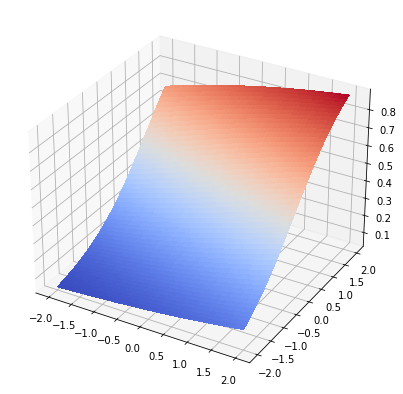

In [62]:
plot_scalar_field(make_logistic(0.35,1,0.56), -2, 2, -2, 2)

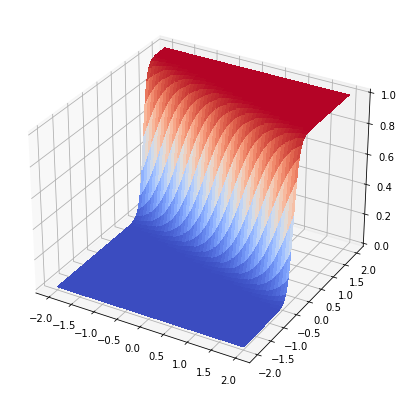

In [63]:
plot_scalar_field(make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919), -2, 2, -2, 2)

In [64]:
def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x=xstart
    y=ystart
    z=zstart
    grad=approx_gradient3(f,x,y,z)
    steps=0
    while length(grad)>tolerance and steps<max_steps:
        x-=0.01*grad[0]
        y-=0.01*grad[1]
        z-=0.01*grad[2]
        grad=approx_gradient3(f,x,y,z)
        steps+=1
    print(steps)
    return x,y,z

In [65]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

7244


(3.7167003153580045, 11.422062409195114, 5.596878367305919)

In [66]:
def partial_derivative(f,i,v,**kwargs):
    def cross_section(x):
        arg=[(vj if j!=i else x) for j,vj in enumerate(v)]
        return f(*arg)
    return approx_derivative(cross_section,v[i],**kwargs)

In [67]:
def approx_gradient(f,v,dx=1e-6):
    return [partial_derivative(f,i,v) for i in range(0,len(v))]

In [68]:
def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v=vstart
    grad=approx_gradient(f,v)
    steps=0
    while length(grad)>tolerance and steps<max_steps:
        v=[(vi-0.01*dvi) for vi,dvi in zip(v,grad)]
        grad=approx_gradient(f,v)
        steps
    return v

In [69]:
def sum_square(*v):
    return sum([(x-1)**2 for x in v])

In [70]:
v=[2,2,2,2,2]

In [71]:
gradient_descent(sum_square,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]